In [6]:
#Linear Radon transform modeling with a synthetic example.
using SeisPlot, SeisProcessing

┌ Info: Recompiling stale cache file /home/carozzi/.julia/compiled/v1.0/SeisPlot/MaX9O.ji for SeisPlot [00783350-183d-11e9-0ed7-9f3f45823183]
└ @ Base loading.jl:1190


In [3]:
# 1- Model 2d seismic data with linear events

nt = 250;
dt = 0.004;
nx = 30;
dx = 5;

param = Dict(:nt=>nt, :dt=>dt, :nx1=>nx, :dx1=>dx,
                :p1=>[0.0003, -0.0005, 0.000], :p2=>[0, 0, 0], :p3=>[0, 0, 0], :p4=>[0, 0, 0],
                :tau=>[0.3, 0.4, 0.5], :amp=>[-1.0, 0.7, 1], :f0=>20);

d = SeisLinearEvents(;param...);

h = collect(0:nx-1)*dx;

# 2- Define linear moveouts p
pmin=-2*dt/dx;
pmax = 2*dt/dx;
np = 60; 
dp = (pmax-pmin)/(np-1);
p = collect(pmin:dp:pmax);


In [4]:
# 3- Transform to Radon domain

m = SeisRadonFreqInv(d, order="linear", dt=dt, h=h, p=p, flow=2, fhigh=80,
                        mu=0.00001);

# 4- Transform back to data domain
d2 = SeisRadonFreqFor(m, nt, order="linear", dt=dt, h=h, p=p,flow=2, fhigh=80)

# 5- Calculate and print modeling error (%)
e2 = 100 * sum((d-d2).^2)/sum(d.^2);
println("Relative error = ", e2, " %")

Relative error = 0.0005187653295646793 %


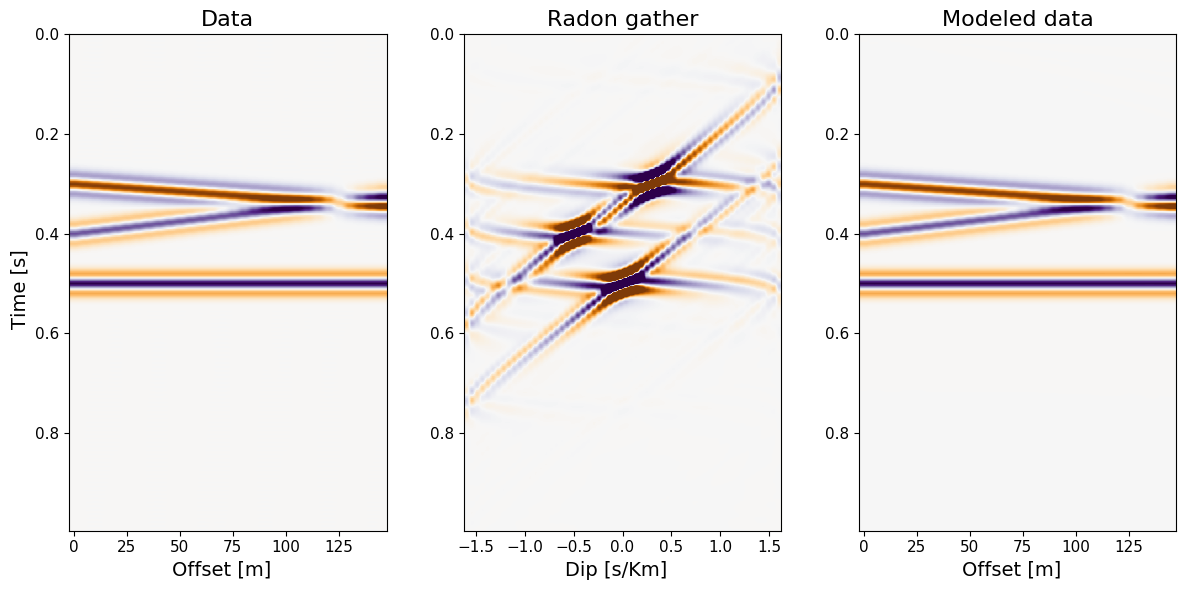

In [7]:
# 6- Plot input data, Radon gather, and modeled data

figure(1, figsize=(12,6));
subplot(131)
SeisPlotTX(d, title="Data", xlabel="Offset [m]", ylabel="Time [s]", vmin=-1, vmax=1,
            ox=h[1], dx=dx, dy=dt, fignum=1)

subplot(132)
SeisPlotTX(m[1:nt,:], title="Radon gather", xlabel="Dip [s/Km]",
            ox=1000*p[1], dx=1000*(p[2]-p[1]), dy=dt, fignum=1)

subplot(133)
SeisPlotTX(d2, title="Modeled data", xlabel="Offset [m]", vmin=-1, vmax=1,
            ox=h[1], dx=dx, dy=dt, fignum=1)

tight_layout()

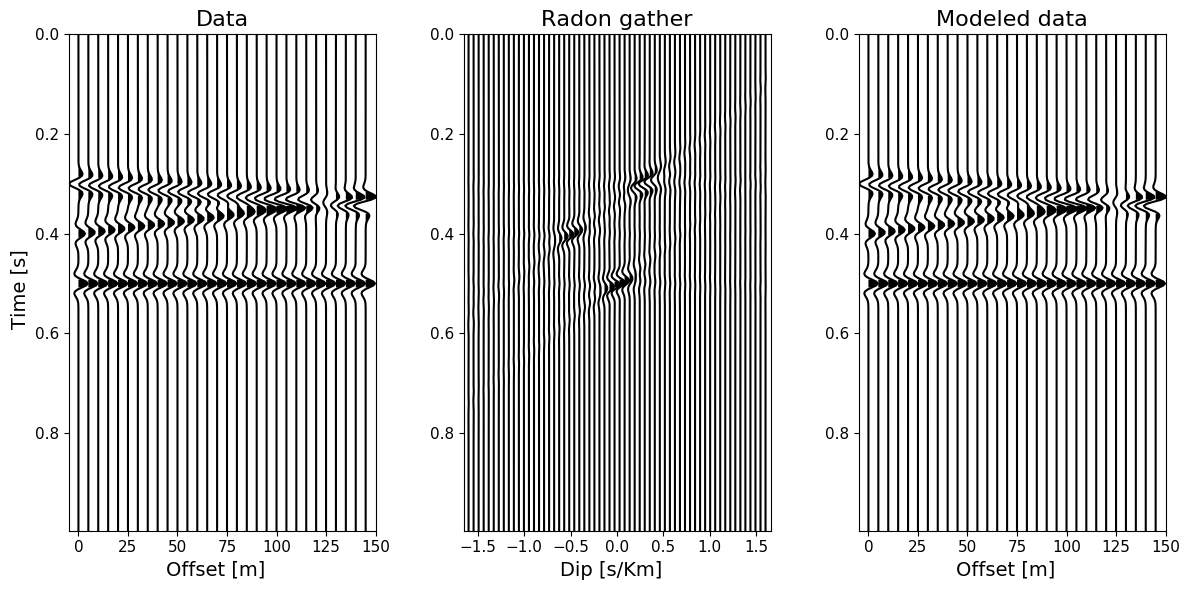

In [8]:
# 7- Plot input data, Radon gather and modeled data, wiggle in style

figure(1, figsize=(12,6));
subplot(131)
SeisPlotTX(d, title="Data", style="wiggles", xlabel="Offset [m]", ylabel="Time [s]", 
            ox=h[1], dx=dx, dy=dt, fignum=1)

subplot(132)
SeisPlotTX(m[1:nt,:], style="wiggles", title="Radon gather", xlabel="Dip [s/Km]",
            ox=1000*p[1], dx=1000*(p[2]-p[1]), dy=dt, fignum=1)

subplot(133)
SeisPlotTX(d2, style="wiggles", title="Modeled data", xlabel="Offset [m]", 
            ox=h[1], dx=dx, dy=dt, fignum=1)

tight_layout()